<a href="https://colab.research.google.com/github/sharadnatarajSJSU/Deep-Neural-Networks/blob/main/part%20a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import random


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_folder='/content/drive/MyDrive/SJSU assignment Docs/Eluvio Challange/Train'
test_folder = '/content/drive/MyDrive/SJSU assignment Docs/Eluvio Challange/Test'

In [ ]:
classes = ['Acura',
 'Audi',
 'BMW',
 'Chevrolet',
 'Ford',
 'Honda',
 'Hyundai',
 'Infiniti',
 'KIA',
 'Lamborghini',
 'Lexus',
 'Mazda',
 'MercedesBenz',
 'Nissan',
 'Porsche',
 'Tesla',
 'Toyota',
 'Volkswagen']

In [ ]:
class_dict = {'Acura': 0,
 'Audi': 1,
 'BMW': 2,
 'Chevrolet': 3,
 'Ford': 4,
 'Honda': 5,
 'Hyundai': 6,
 'Infiniti': 7,
 'KIA': 8,
 'Lamborghini': 9,
 'Lexus': 10,
 'Mazda': 11,
 'MercedesBenz': 12,
 'Nissan': 13,
 'Porsche': 14,
 'Tesla': 15,
 'Toyota': 16,
 'Volkswagen': 17}

In [ ]:
def load_images_and_labels(data_path, cates): 
  X = []
  y = []
  i = 0
  for  cate in cates: 
    for img_name in os.listdir(data_path + '/'+ cate + '/'):
      i = i +1
      print(i)
      img = cv2.imread(data_path + '/' + cate + '/' + img_name)
      if img is not None: 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_array = Image.fromarray(img, 'RGB')
        # resize image to 227x227 which is the required input size of the Alexnet model
        img_rs = img_array.resize((227,227))
        # convert the image to array
        img_rs = np.array(img_rs)
      
        X.append(img_rs)
        y.append(class_dict[cate])
  return X, y

In [ ]:
X_train, y_train = load_images_and_labels(train_folder, classes)

In [ ]:
X_test, y_test = load_images_and_labels(test_folder, classes)

In [ ]:
keylist = list(class_dict.keys())

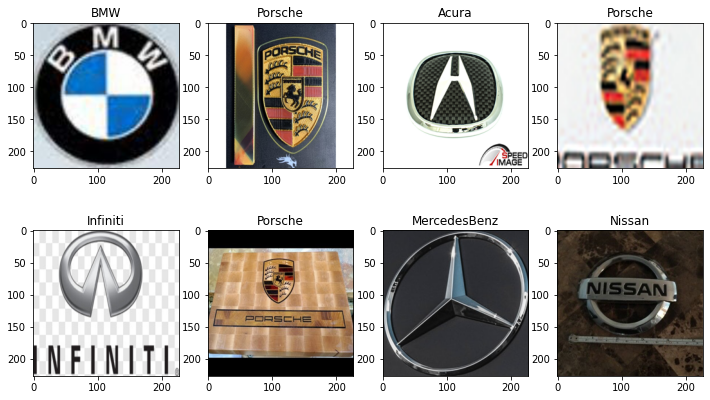

In [ ]:
plt.figure(figsize = (12,7))
for i in range(8):
  ind = random.randint(0, len(X_train))
  plt.subplot(240 + 1 + i)
  plt.imshow(X_train[ind])
  plt.title(keylist[y_train[ind]])

In [ ]:
from tensorflow.keras.utils import to_categorical

def preprocess_data(X, y):
  # convert X from list to array
  X = np.array(X)
  y = np.array(y)

  y = to_categorical(y)
  # convert integer values of X into floats
  X = X.astype(np.float32)

  # normalization 
  X = X/255.0
  
  return X, y

In [ ]:
(X_train, y_train) = preprocess_data(X_train, y_train)
(X_test, y_test) = preprocess_data(X_test, y_test)

Splitting data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.optimizers import gradient_descent_v2,adam_v2
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils
from keras.regularizers import l2
from keras.initializers import RandomNormal, VarianceScaling

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3),
                 input_shape=(227,227,3),
                 padding='valid',
                 bias_initializer='glorot_uniform',
                 kernel_regularizer=l2(0.00004),
                 kernel_initializer=VarianceScaling(scale=2.0, mode='fan_in', distribution='normal', seed=None),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3),
                 padding='valid',
                 bias_initializer='glorot_uniform',
                 kernel_regularizer=l2(0.00004),
                 kernel_initializer=VarianceScaling(scale=2.0, mode='fan_in', distribution='normal', seed=None),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3),
                 padding='valid',
                 bias_initializer='glorot_uniform',
                 kernel_regularizer=l2(0.00004),
                 kernel_initializer=VarianceScaling(scale=2.0, mode='fan_in', distribution='normal', seed=None),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, (3,3),
                 padding='valid',
                 bias_initializer='glorot_uniform',
                 kernel_regularizer=l2(0.00004),
                 kernel_initializer=VarianceScaling(scale=2.0, mode='fan_in', distribution='normal', seed=None),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(4096, activation='relu', bias_initializer='glorot_uniform'))
model.add(Dropout(0.5))

model.add(Dense(4096, activation='relu', bias_initializer='glorot_uniform'))
model.add(Dropout(0.5))

# final activation is softmax, tuned to the number of classes/labels possible
model.add(Dense(18, activation='softmax'))

Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
    # featurewise_center=False,
    # samplewise_center=False,
    # featurewise_std_normalization=True,
    # samplewise_std_normalization=True,
    # zca_whitening=True,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True)

In [ ]:
sgd = gradient_descent_v2.SGD(lr=0.005, decay=1e-6, momentum=0.95, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['categorical_accuracy'])

# Let's look at the summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 225, 225, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
def train_model_with_aug(model, X_train, y_train, X_test, y_test, epochs,batch_size):

  
  
  it_train = datagen.flow(X_train, y_train, batch_size = batch_size)
  steps = X_train.shape[0]//batch_size
  history = model.fit_generator(it_train,epochs = epochs,
                                validation_data = (X_test, y_test), verbose = 1, 
                                )
  # Evaluating the model
  _,acc = model.evaluate(X_test, y_test, verbose = 1)
  print('%.3f' % (acc * 100))

  return history, acc

In [ ]:
history, acc = train_model_with_aug(model,X_train,y_train,X_val,y_val,epochs= 100,batch_size = 32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
24/24 [==============================] - 13s 384ms/step - loss: 3.4042 - categorical_accuracy: 0.0458 - val_loss: 2.9680 - val_categorical_accuracy: 0.0667
Epoch 2/100
24/24 [==============================] - 9s 359ms/step - loss: 2.9398 - categorical_accuracy: 0.0614 - val_loss: 2.9470 - val_categorical_accuracy: 0.0370
Epoch 3/100
24/24 [==============================] - 10s 405ms/step - loss: 2.9286 - categorical_accuracy: 0.0588 - val_loss: 2.9313 - val_categorical_accuracy: 0.0815
Epoch 4/100
24/24 [==============================] - 9s 354ms/step - loss: 2.9137 - categorical_accuracy: 0.0850 - val_loss: 2.8968 - val_categorical_accuracy: 0.0741
Epoch 5/100
24/24 [==============================] - 8s 351ms/step - loss: 2.8835 - categorical_accuracy: 0.0889 - val_loss: 2.8514 - val_categorical_accuracy: 0.0815
Epoch 6/100
24/24 [==============================] - 9s 353ms/step - loss: 2.8536 - categorical_accuracy: 0.0876 - val_loss: 2.8778 - val_categorical_accuracy: 0.1

In [ ]:
def plot_accuracy(history):
  plt.figure(figsize = (10,6))
  plt.plot(history.history['categorical_accuracy'], color = 'blue', label = 'train')
  plt.plot(history.history['val_categorical_accuracy'], color = 'red', label = 'val')
  plt.legend()
  plt.title('Accuracy')
  plt.show()
  


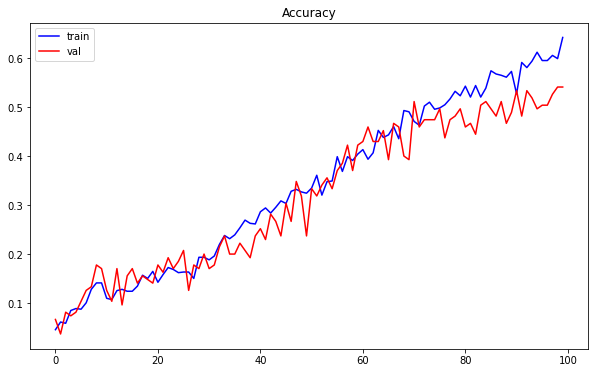

In [ ]:
plot_accuracy(history)